# Bioindicators of Strawberry Creek
### Professors George Roderick, John Huelsenbeck & Alan Shabel
<br>

**Estimated Time:** _50 minutes_
<br>
**Notebook Created by:** Andy Sheu, Joshua Asuncion and Karalyn Chong
<br>
**Code Maintenance:** Elias Saravia

--- 

<img src="images/Strawberry_Creek.png" style="width: 400px;"/>

Welcome! Throughout this lab you will be using Python to analyze the data that you collected from the North and South Forks of Strawberry Creek. Python is a general-purpose programming language that allows one to use data analysis methods to answer questions about data. The main purpose of this lab is to use data analysis and biological metrics to determine whether or not the ecological health of the two branches of Strawberry Creek are significantly different.

**Learning Outcomes**

By the end of the notebook, students should be able to:

1. Explain the use of biological organisms as indicators of ecosystem health.
2. Interpret biological metrics of diversity: taxon richness, %EPT, biotic index (FBI), % filterers, % predators, Shannon index.
3. Understand how to contruct a Null and Alternative Hypothesis.
3. Use simulated resampling, or permutaions, to determine if two distributions are different.
4. Apply p-value to describe statistical significance.

## Table of Contents 

1. [Jupyter Notebooks](#1)
    - [Types of Cells](#1.1)
    - [Running Cells](#1.2)
    - [Editting, Saving and Submitting](#1.3)
<br/><br/>
2. [Data Recording](#2)
<br/><br/>
3. [Introduction to Data Analytics](#3)
    - [Null and Alternate Hypothesis](#3.1)
    - [Permutation Test](#3.2)
    - [P-values & Statistical Significance](#3.3)
<br/><br/>
4. [Your Data](#4)
<br/><br/>
5. [Submitting the Lab](#5)

<br>

# 1. Jupyter Notebooks <a id='1'></a>
---

This lab is currently set up in a Jupyter Notebook. A Jupyter Notebook is an online, interactive computing environment, composed of different types of __cells__. Cells are chunks of code or text that are used to break up a larger notebook into smaller, more manageable parts and to let the viewer modify and interact with the elements of the notebook.
 
### Types of cells <a id= '1.1'> </a>

There are two types of cells in Jupyter, __code__ cells and __markdown__ cells. Code cells are cells indicated with “In [  ]:” to the left of the cell. In these cells you can write you own code and run the code in the individual cell.
Markdown cells hold text a majority of the time and do not have the “In [ ]” to the left of the cell.

### Running cells <a id= '1.2'> </a>

'Running' a cell is similar to pressing 'Enter' on a calculator once you've typed in an expression; it computes all of the expressions contained within the cell.

To run a code cell, you can do one of the following:
- press __Shift + Enter__
- click __Cell -> Run Cells__ in the toolbar at the top of the screen.

You can navigate the cells by either clicking on them or by using your up and down arrow keys. Try running the cell below to see what happens. 

In [1]:
print("Hello, World")

Hello, World


The input of the cell consists of the text/code that is contained within the cell's enclosing box. Here, the input is an expression in Python that "prints" or repeats whatever text or number is passed in. 

The output of running a cell is shown in the line immediately after it. Notice that markdown cells have no output. 

### Editing, Saving and Sumbitting <a id='1.3'> </a>

- To __edit__ a cell simply click on the desired cell and begin typing 
- To __save__ your notebook press _command + s_ on the keyboard 
- We will go into the specifics of how to __submit__ your work at the end of the lab, but you will essentially be converting your work into a PDF file and then including it in your Lab Report

Run this cell before proceeding with the rest of the lab!

In [2]:
import numpy as np
import pandas as pd
from strawberry_creek_widget import *
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from IPython.display import display
from IPython.display import clear_output
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<br><br><br><br>

# 2. Data Recording <a id='2'> </a>
---

In this section you will be importing the data you collected in the lab!

To import your data you must:
1. Open up the desired google sheets form.
2. Navigate to the __File__ tab and hover over __Download__.
3. From there another drop down tab should appear with differect formats to download the form as. Select the __Comma-Separated Values (csv)__ option.
4. Save the file name as: `strawberry_creek.csv`
5. Click on the Jupyterhub icon on the top left hand corner. You will be redirected to another page where you will upload your data. Once you upload the data, return to this notebook titled `Strawberry Creek Notebook.`

To import the data set just run the following cell!  If all goes smoothly, you will see the first few rows of your data file.

In [3]:
#data = pd.read_csv("data set name")
data = pd.read_csv("SC_data.csv")
data.head()

,Group,Fork,Richness,EPT,FBI,Filters,Predators,Shannon
0,1,North,8,32,5.52,36,6,0.9
1,2,North,7,42,5.14,36,6,0.9
2,3,North,7,40,5.28,62,2,0.4
3,4,North,6,50,5.48,65,0,0.5
4,5,North,6,30,5.18,66,0,1.0


<br>

# 3. Introduction to Data Analytics <a id= '3'> </a>
---

## Null Hypothesis vs. Alternate Hypothesis <a id='3.1'> </a>

One of the first problems to work through when looking at a data set is to determine whether or not the trends in the data are significant or purely due to random chance. In this particular lab we are trying to determine whether or not the difference between the ecological health of the two branches of the creek is significant or not. To do this we begin by forming a null hypothesis and an alternative hypothesis to test. 

>__Null Hypothesis__: A null hypothesis claims that there is no statistical difference between two distributions and that any difference is due to experimental error, measurement error, or chance.

>__Alternative Hypothesis__: An alternative hypothesis essentially counters the null hypothesis and claims that the difference in distribution is meaningful, or significant.

**Example Null and Alternative Hypothesis**


Say we have a data set with data on the number of boba shops on Southside and Northside. The data set shows that Southside has a higher average of boba shops than Northside, but it is unclear whether the difference in the average is due to chance or some other unknown reason. For this data set, potential hypotheses would be:

>__Example Null Hypothesis__
- The distribution of the average number of boba shops is the same for the samples taken from Southside as the samples taken from Northside. The difference in sample distribution is due to chance. 

>__Example Alternative Hypothesis__  
- The average number of boba shops in samples from Southside is lower than the average number of boba shops in samples from Northside.


## Discussion Questions

**Question 1a**

**What would be a potential null hypothesis for this lab?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 1b**

**What would be a potential alternative hypothesis?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

After you have your null and alternative hypothesis, the next step is to simulate the distribution under the null hypothesis! Theoretically, if the differences in distributions were solely due to random chance, then the data that the distribution originally comes from would be the same. This is where permutation tests come in to play.

<br>

## Permutation Test <a id='3.2'> </a>

A permutation test essentially __shuffles the given data set among categories and creates new distributions__. In this case, we are using a permutation test to shuffle the difference in ecological health of the two creeks. As was previously mentioned, a permutation test simulates the null hypothesis because it assumes that there is no significant difference between the distributions. 

To demonstrate, we will run permutation testing on example data of a biotic index (FBI scores) collected from the North and South Fork in order to understand the process.  You will analyze your own data after this.

Run the following code below to enter the example data and see it displayed in a data frame.

In [4]:
example = pd.DataFrame({
    'FBI Score':[3.5, 4.0, 3.0, 3.5, 4.2, 4.5, 5.0, 3.6, 4.9, 5.1, 3.4, 2.9],
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
example

,FBI Score,Fork
0,3.5,North
1,4.0,North
2,3.0,North
3,3.5,North
4,4.2,North
5,4.5,South
6,5.0,South
7,3.6,South
8,4.9,South
9,5.1,South


Here, we see each row of the dataset represents an `FBI Score` for a specific `Fork` either North or South.,

With the data, we can compare the North and South Fork by calculated the difference between the means of each Fork. Run the cell below to see the observed difference in FBI means between the two samples.

In [5]:
observed_difference = example[example['Fork']=='North'].mean() - example[example['Fork']=='South'].mean()
observed_difference

FBI Score   -0.56
dtype: float64

We call this our observed difference because this statistic is observed from data that is actually collected, although from an example in our case.

In permutation testing, we will be shuffling the data points between the two forks. For one permutation, we will calculate the FBI Score means for each fork. In this case, the mean difference is no longer an observed difference but a simulated difference. Run the cells below to generate a permutation of the data and to calculate the new difference.

In [6]:
perm_example = pd.DataFrame({
    'FBI Score':example['FBI Score'].sample(len(example['FBI Score'])),
    'Fork':np.append(np.repeat('North', 5), np.repeat('South', 7))
})
perm_example

,FBI Score,Fork
6,5.0,North
7,3.6,North
2,3.0,North
0,3.5,North
11,2.9,North
8,4.9,South
9,5.1,South
1,4.0,South
10,3.4,South
3,3.5,South


In [7]:
perm_difference = perm_example[perm_example['Fork']=='North'].mean() - perm_example[perm_example['Fork']=='South'].mean()
perm_difference

FBI Score   -0.628571
dtype: float64

This is just for one permutation of the data. We perform many permutation tests (about 1000 of them) and with these values we can plot the distribution of differences. Using this distribution of simulated differences, we can compare it with our actual observed difference to see how likely it is to observe this difference and if our null hypotheis is true.

In [8]:
def difference_in_means(fbi_scores):
    return np.mean(fbi_scores[:5]) - np.mean(fbi_scores[5:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = example['FBI Score'].sample(len(example['FBI Score']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)

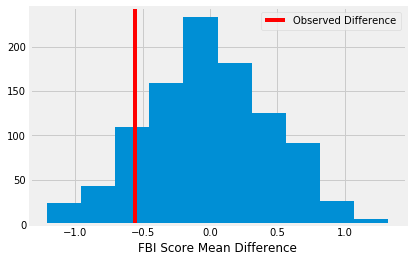

In [9]:
plt.hist(permutation_differences)
plt.axvline(observed_difference[0], color='red', label='Observed Difference')
plt.xlabel('FBI Score Mean Difference')
plt.legend();

Using this plot, we can guess if the null hypothesis is true (the observed difference between the two branches is due to random chance) or if the alternative hypothesis is true (that it is not due to chance alone).



## Discussion Question

**Question 2**

**How likely is it for the observed difference to occur, and can we reject the null hypothesis?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br><br>

## P-Values & Statistical Significance <a id='3.3'> </a>

Now that we have a distribution of what the differences in FBI Scores generally look like, we can calculate the p-value to determine how probable it is for the observed_differnce to occur. To calculate the p-value we count the number of times the difference is more extreme or equal to the observed difference in the distribution and divide it by the total amount of permutations. Note that for some hypotheses the observed value may be on the left side of the distribution and for others, the right.

In [10]:
p_val_count = sum(i <= observed_difference[0]for i in permutation_differences)/len(permutation_differences)
p_val_count

0.108

If the p-value is small, it implies that it is very unlikely for this statistic to occur under the null hypothesis and we say we “reject the null hypothesis”. Otherwise, if the p-value is large, it implies that the observed test statistic has a high likelihood of occurring under the null and we say we “fail to reject the null hypothesis”. 

A conventional cut-off for p-values is 0.05 or 5%. If the p-value is **less than or equal to 5%**, then the p-value is deemed **“statistically significant”**. Here, the p-value is larger than that. We will discuss p-values more in lab.


## Discussion Question

**Question 3**

**Using the calculated p-value above, do we reject the null hypothesis or fail to reject the null hypothesis? Why?**

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br>

# 4. Your Data<a id='4'> </a>
---

Next, you will calculate the mean differences for each of the metrics you measured.  Run the next cell for the observed differences between forks for each of the biological measures.

In [10]:
observed_difference = data[data['Fork']=='North'].mean() - data[data['Fork']=='South'].mean()
observed_difference

Group         0.000
Richness     -1.000
EPT         -12.300
FBI           1.944
Filters      21.300
Predators   -37.700
Shannon      -0.495
dtype: float64

Let's start with the FBI index.  The next cell runs the permutations, graphs the data, and calculates a p-value, just like for the sample data above.

In [11]:
def difference_in_means(SC_scores):
    return np.mean(SC_scores[:10]) - np.mean(SC_scores[10:])

n_repeats = 1000
permutation_differences = []
for i in range(n_repeats):
    permutation = data['FBI'].sample(len(data['FBI']))
    new_difference = difference_in_means(permutation)
    permutation_differences.append(new_difference)

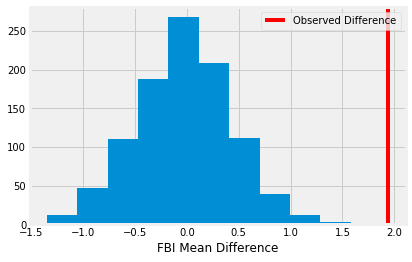

In [12]:
plt.hist(permutation_differences)
plt.axvline(observed_difference["FBI"], color='red', label='Observed Difference')
plt.xlabel('FBI Mean Difference')
plt.legend();

In [13]:
p_val_count = sum(i >= observed_difference["FBI"] for i in permutation_differences)/len(permutation_differences)
p_val_count

0.0

Now, it is easy to repeat the same analysis for each of the other biological measures you collected in the lab. One of the values of using a Notebook is that it makes repeating the same process easy. For instance, we can use a widget that takes the code and makes it interactive, so that you can select in a dropdown menu which metric you want to use.

Note that for the p-value, if the observed difference is on the _left_ side of the distribution, you are interested in how many permutations were more extreme on the _left_ side, and vice versa for the right. This means changing the code to either check if the observed difference is greater than or less than the permutation differences, but we take this into account in the code below.

Run the following code cell to instantiate the interactive widget. Try selecting different metrics to see how the plot changes.

In [14]:
interact(mean_difference,
         data=fixed(data),
         stat=widgets.Dropdown(options=['Richness', 'EPT', 'Filters', 'Predators', 'Shannon'],
                               value='Richness',
                               description='Metric:',
                               disabled=False));

interactive(children=(Dropdown(description='Metric:', options=('Richness', 'EPT', 'Filters', 'Predators', 'Sha…


## Discussion Questions

__Question 4a__

__For each of the options in the dropdown menu (FBI index, Richness, ETP, Filters, Predators and Shannon index), explain what the histograms mean and why the histograms look the way they do.__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

**Question 4b**

__Do you see anything unusual about any of the histograms or are they consistent with your expectations and hypotheses?__

*WRITE YOUR ANSWER HERE. REPLACE THIS LINE WITH YOUR ANSWER BY DOUBLE-CLICKING THE CELL.*

<br> 

# 5. Submitting the Lab<a id='5'> </a>
___


## Submitting your work
To convert your work to a pdf:
- run the following cell
- right-click the link that says "Download this and submit to gradescope"
- click "save link as" to save the pdf

<div class="alert alert-warning">
<b> NOTE: the link will say "Submit to Gradescope", but please follow your professor's instructions on where to submit the pdf </b> 
</div>

In [ ]:
# run this cell to convert your work to a pdf for submission
!pip install gsExport -q
import gsExport
gsExport.generateSubmission("Strawberry Creek Notebook.ipynb")

<br><br><br>
## Data Science Opportunties

---

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings